### 날씨 API 가져와서 선그래프 그리기

##### 날씨 API 가져오기

In [106]:
import os
import sys
import urllib.request # 웹 요청을 전송하고 응답을 수신하는 모듈 (브라우저 역할)

# 서버로 전송하는 데이터
api_key = "YgC6RL7Xuzrbvz7msHuvRG0JZ%2BJxR0E6iUI4qrJNk78%2B5FdBneHQ8wktN9kjkpfJFCUeVtCuvThmYWikuonEuA%3D%3D"

# get 방식 전송 데이터 구성
url = "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?ServiceKey={0}&pageNo=1&numOfRows=50&dataCd=ASOS&dateCd=DAY&startDt=20240901&endDt=20240930&stnIds=108&dataType=JSON".format(api_key)
request = urllib.request.Request(url)

response = urllib.request.urlopen(request) # 요청 보내기 + 응답 수신

rescode = response.getcode() # 응답코드 읽기
if(rescode==200): # 정상 응답이라면
    response_body = response.read() # 응답 데이터 읽기
    print(response_body.decode('utf-8')) # binary 데이터를 text 데이터로 변환 여기서는 utf-8
else:
     print("Error Code:" + rescode)

print(type(response_body))

{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"stnId":"108","stnNm":"서울","tm":"2024-09-01","avgTa":"27.1","minTa":"24.6","minTaHrmt":"0557","maxTa":"31.6","maxTaHrmt":"1458","mi10MaxRn":"","mi10MaxRnHrmt":"","hr1MaxRn":"","hr1MaxRnHrmt":"","sumRnDur":"","sumRn":"","maxInsWs":"7.5","maxInsWsWd":"270","maxInsWsHrmt":"1444","maxWs":"4.3","maxWsWd":"250","maxWsHrmt":"1546","avgWs":"2.0","hr24SumRws":"1745","maxWd":"250","avgTd":"19.5","minRhm":"41","minRhmHrmt":"1525","avgRhm":"64.9","avgPv":"22.8","avgPa":"997.1","maxPs":"1007.5","maxPsHrmt":"0746","minPs":"1005.4","minPsHrmt":"1825","avgPs":"1006.8","ssDur":"13.0","sumSsHr":"6.9","hr1MaxIcsrHrmt":"1200","hr1MaxIcsr":"3.38","sumGsr":"20.05","ddMefs":"","ddMefsHrmt":"","ddMes":"","ddMesHrmt":"","sumDpthFhsc":"","avgTca":"4.5","avgLmac":"2.8","avgTs":"33.0","minTg":"20.0","avgCm5Te":"28.0","avgCm10Te":"28.0","avgCm20Te":"27.3","avgCm30Te":"27.2","avgM05Te":"27.9","avgM10Te

In [107]:
# import requests

# api_key = 'YgC6RL7Xuzrbvz7msHuvRG0JZ+JxR0E6iUI4qrJNk78+5FdBneHQ8wktN9kjkpfJFCUeVtCuvThmYWikuonEuA=='

# url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
# params ={'serviceKey' : api_key, 'dataType' : 'XML', 'dataCd' : 'ASOS', 
#          'dateCd' : 'DAY', 'startDt' : '20240801', 'endDt' : '20241001', 'stnIds' : '108' }

# response = requests.get(url, params=params)
# print(response.content.decode('utf-8'))

In [108]:
type(response)

http.client.HTTPResponse

In [109]:
import json
text_response = response_body.decode('utf-8')
dict_response = json.loads(text_response)
dict_response

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'},
  'body': {'dataType': 'JSON',
   'items': {'item': [{'stnId': '108',
      'stnNm': '서울',
      'tm': '2024-09-01',
      'avgTa': '27.1',
      'minTa': '24.6',
      'minTaHrmt': '0557',
      'maxTa': '31.6',
      'maxTaHrmt': '1458',
      'mi10MaxRn': '',
      'mi10MaxRnHrmt': '',
      'hr1MaxRn': '',
      'hr1MaxRnHrmt': '',
      'sumRnDur': '',
      'sumRn': '',
      'maxInsWs': '7.5',
      'maxInsWsWd': '270',
      'maxInsWsHrmt': '1444',
      'maxWs': '4.3',
      'maxWsWd': '250',
      'maxWsHrmt': '1546',
      'avgWs': '2.0',
      'hr24SumRws': '1745',
      'maxWd': '250',
      'avgTd': '19.5',
      'minRhm': '41',
      'minRhmHrmt': '1525',
      'avgRhm': '64.9',
      'avgPv': '22.8',
      'avgPa': '997.1',
      'maxPs': '1007.5',
      'maxPsHrmt': '0746',
      'minPs': '1005.4',
      'minPsHrmt': '1825',
      'avgPs': '1006.8',
      'ssDur': '13.0',
      'sumSsHr': '6.9

In [110]:
dict_response.keys()
print('dict_response의 타입:', type(dict_response["response"]) )
print('response 키:', dict_response["response"].keys())
print('body 키:', dict_response["response"]["body"].keys())
print('items 키:', dict_response["response"]["body"]["items"].keys())
print('item 키:', dict_response["response"]["body"]["items"]["item"][0].keys()) # 마침내 리스트

dict_response의 타입: <class 'dict'>
response 키: dict_keys(['header', 'body'])
body 키: dict_keys(['dataType', 'items', 'pageNo', 'numOfRows', 'totalCount'])
items 키: dict_keys(['item'])
item 키: dict_keys(['stnId', 'stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd', 'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm', 'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs', 'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt', 'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt', 'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te', 'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te', 'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn', 'iscs', 'sumFogDur'])


In [111]:
print(dict_response.keys())

dict_keys(['response'])


In [112]:
dict_response['response']
print( type( dict_response['response'] ) )

# print( dict_response['response'][0].keys() ) # 리스트니까 반복문
for item in dict_response["response"]["body"]["items"]["item"]:
    print("최고 기온", item['maxTa'])

for item in dict_response["response"]["body"]["items"]["item"]:
    print("최저 기온", item['minTa'])

for item in dict_response["response"]["body"]["items"]["item"]:
    print("평균 기온", item['avgTa'])




<class 'dict'>
최고 기온 31.6
최고 기온 26.9
최고 기온 32.0
최고 기온 33.3
최고 기온 28.8
최고 기온 25.7
최고 기온 31.3
최고 기온 32.8
최고 기온 34.1
최고 기온 33.9
최고 기온 34.6
최고 기온 27.1
최고 기온 28.0
최고 기온 32.2
최고 기온 32.4
최고 기온 32.2
최고 기온 33.2
최고 기온 33.6
최고 기온 32.6
최고 기온 28.6
최고 기온 21.9
최고 기온 26.7
최고 기온 26.1
최고 기온 26.9
최고 기온 27.3
최고 기온 28.0
최고 기온 28.0
최고 기온 27.9
최고 기온 29.0
최고 기온 28.5
최저 기온 24.6
최저 기온 22.2
최저 기온 23.2
최저 기온 23.2
최저 기온 25.6
최저 기온 23.3
최저 기온 22.8
최저 기온 22.6
최저 기온 24.1
최저 기온 25.6
최저 기온 25.4
최저 기온 24.8
최저 기온 24.2
최저 기온 25.2
최저 기온 24.2
최저 기온 21.3
최저 기온 25.8
최저 기온 26.5
최저 기온 25.6
최저 기온 17.9
최저 기온 17.1
최저 기온 16.9
최저 기온 16.6
최저 기온 15.6
최저 기온 18.6
최저 기온 21.1
최저 기온 19.1
최저 기온 19.2
최저 기온 19.1
최저 기온 18.3
평균 기온 27.1
평균 기온 24.5
평균 기온 27.0
평균 기온 27.9
평균 기온 26.3
평균 기온 24.0
평균 기온 26.5
평균 기온 27.2
평균 기온 28.5
평균 기온 29.4
평균 기온 29.0
평균 기온 25.4
평균 기온 25.9
평균 기온 28.0
평균 기온 27.5
평균 기온 26.8
평균 기온 28.6
평균 기온 29.4
평균 기온 29.1
평균 기온 25.0
평균 기온 19.3
평균 기온 21.0
평균 기온 20.8
평균 기온 21.0
평균 기온 23.3
평균 기온 23.6
평균 기온 22.7
평균 기온 23.2
평균 기온 23.5
평균 기온 

In [129]:
import pandas as pd
from datetime import datetime

df = pd.DataFrame(dict_response["response"]["body"]["items"]["item"])

df.head()
df_loc = df.loc[:,['tm', 'stnNm', 'maxTa', 'minTa', 'avgTa']]
df_loc.columns = ['Date', 'Area', 'Max', 'Min', 'Avg']

# datetime_string = "2024-09-01"
# datetime_format = "%Y-%m-%d"
# datetime_result = datetime.strptime(datetime_string, datetime_format)
# print(type(datetime_result))

df_loc["Max"] = df_loc['Max'].map(lambda v : float(v))
df_loc["Min"] = df_loc['Min'].map(lambda v : float(v))
df_loc["Avg"] = df_loc['Avg'].map(lambda v : float(v))
print( df_loc )

<class 'datetime.datetime'>
          Date Area   Max   Min   Avg
0   2024-09-01   서울  31.6  24.6  27.1
1   2024-09-02   서울  26.9  22.2  24.5
2   2024-09-03   서울  32.0  23.2  27.0
3   2024-09-04   서울  33.3  23.2  27.9
4   2024-09-05   서울  28.8  25.6  26.3
5   2024-09-06   서울  25.7  23.3  24.0
6   2024-09-07   서울  31.3  22.8  26.5
7   2024-09-08   서울  32.8  22.6  27.2
8   2024-09-09   서울  34.1  24.1  28.5
9   2024-09-10   서울  33.9  25.6  29.4
10  2024-09-11   서울  34.6  25.4  29.0
11  2024-09-12   서울  27.1  24.8  25.4
12  2024-09-13   서울  28.0  24.2  25.9
13  2024-09-14   서울  32.2  25.2  28.0
14  2024-09-15   서울  32.4  24.2  27.5
15  2024-09-16   서울  32.2  21.3  26.8
16  2024-09-17   서울  33.2  25.8  28.6
17  2024-09-18   서울  33.6  26.5  29.4
18  2024-09-19   서울  32.6  25.6  29.1
19  2024-09-20   서울  28.6  17.9  25.0
20  2024-09-21   서울  21.9  17.1  19.3
21  2024-09-22   서울  26.7  16.9  21.0
22  2024-09-23   서울  26.1  16.6  20.8
23  2024-09-24   서울  26.9  15.6  21.0
24  2024-09-25   서울  2

In [135]:
df_loc['Date'] = pd.to_datetime(df_loc['Date'])
df_loc.info()
df_loc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    30 non-null     datetime64[ns]
 1   Area    30 non-null     object        
 2   Max     30 non-null     float64       
 3   Min     30 non-null     float64       
 4   Avg     30 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.3+ KB


,Date,Area,Max,Min,Avg
0,2024-09-01,서울,31.6,24.6,27.1
1,2024-09-02,서울,26.9,22.2,24.5
2,2024-09-03,서울,32.0,23.2,27.0
3,2024-09-04,서울,33.3,23.2,27.9
4,2024-09-05,서울,28.8,25.6,26.3


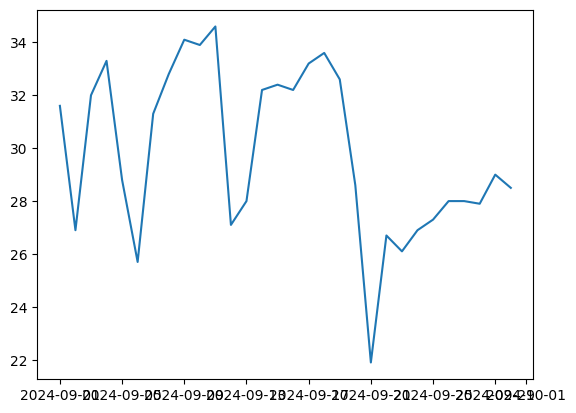

In [137]:
import matplotlib.pyplot as plt

plt.plot(df_loc['Date'], df_loc['Max'])
plt.show()